<a id='top'></a>

# CSCI3022 S21
# Homework 6: Testing
***

**Name**: Clayton Schneider

***

This assignment is due on Canvas by **MIDNIGHT on Friday, April 15**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |
---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
%matplotlib inline

<br>

---
<a/ id='p1'></a>
[Back to top](#top)
## [25 points] Problem 1 - Mins or Maxs?

It's a common data science and numeric problem to need to find **best** estimators, which often represent maximums of "value" functions or minimums of "loss" functions.  In this problem we explore the way that minimums and maximums interact with one another.

Consider rolling some fair, independent, 10-sided dice, with faces [1,2,3,...,10].

#### Part a) Maximums

Suppose we roll 2 such 10-sided die.  Denote $M:=$ the maximum of the two rolls (we will refer to this as the roller having "advantage" when trying to achieve a high roll in a die-rolling game).

i) Use markdown to express the exact pdf of $M$.

ii) Print the expected value of $M$.

iii) Print the variance of $M$.


i) 
$$ f(x) = P(M = x) \left\{
\begin{array}{ll}
    1 : \frac{1}{100} \\
    2 : \frac{3}{100} \\
    3 : \frac{5}{100} \\
    4 : \frac{7}{100} \\
    5 : \frac{9}{100} \\
    6 : \frac{11}{100} \\
    7 : \frac{13}{100} \\
    8 : \frac{15}{100} \\
    9 : \frac{17}{100} \\
    10 :\frac{19}{100} \\
\end{array}
\right.$$ 

ii) $ E[X] = 7.15 $

iii) $ 0.055555 = \frac{0.5}{9} $


#### Part b) Min-Max

In the rest of this problem, we'll explore tacking **both** a minimum and a maximum.  In particular, we define the experiment of *min-max*, in which we compute the minimum of two maximum rolls.  Formally: we roll 2 dice and record their maximum $M_1$, then roll 2 more dice and record their maximum $M_2$.  Finally, we denote $mM:=$ the mimimun of the two $M_1$ and $M_2$ rolls.  We may refer to this as "disadvantage-of-advantage."

Set up a function to simulate $n=10^4$ draws from the $mM$ random variable.  Then, *simulate* and/or *bootstrap* with your function to answer the following:

i) What is the pdf of $mM$?  Plot it as a histogram.

ii) What is the expected value of $mM$?

iii) What is the probability that an $mM$ random variable returns a value greater then 5? Construct both a point estimate and a 90\% confidence interval for this value.

For the bootstrapped CI in iii, it is recommended you group your $10^4$ trials into 100 groups of 100 trials in order to construct a distribution of sample probabilities.

In [29]:
class Die():
    def __init__(self, n_sides=6):
        self.n_sides = n_sides
        self.face = None
        
    def roll(self):
        self.face = np.random.randint(low=1, high=self.n_sides+1)
        return self.face
    
def mM(reps=10**4):
    results = []
    for i in range(reps):
        die1 = Die(n_sides=10).roll()
        die2 = Die(n_sides=10).roll()
    
        die3 = Die(n_sides=10).roll()
        die4 = Die(n_sides=10).roll()
        
        results.append(
        np.min(
            [np.max([die1, die2]),
             np.max([die3, die4])]
        ))
        
    return results

In [30]:
results = mM()

Expected result: 4.8062000000000005
P(mM > 5): 0.40379999999999994


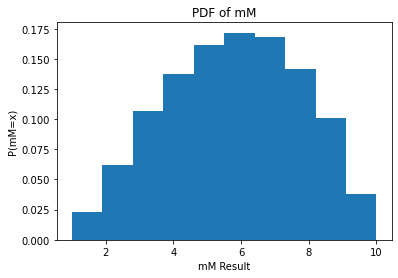

In [53]:
ns = plt.hist(results, density=True)
plt.title("PDF of mM")
plt.xlabel("mM Result")
plt.ylabel("P(mM=x)")

freqs = [(count / len(results)) for count in np.unique(results, return_counts=True)[1]]

print("Expected result:",
    np.sum([(n*x) for n, x in zip(freqs, range(10))]))

print("P(mM > 5):",
     np.sum(freqs[6:]))

In [60]:
cdf5 = []
for i in range(100):
    results = mM(reps=100)
    freqs = [(count / len(results)) for count in np.unique(results, return_counts=True)[1]]
    cdf5.append(np.sum(freqs[6:]))
    
print(
    "90% CI:",
    stats.norm.interval(0.9, loc=np.mean(cdf5), scale=np.std(cdf5)))

90% CI: (0.29223429437595533, 0.49796570562404474)



#### Part c) Max-min

Now, define the experiment of *max-min*, in which we compute the maximum of two minumum rolls.  Formally: we roll 2 dice and record their minimum $m_1$, then roll 2 more dice and record their minimum $m_2$.  Finally, we denote $Mm:=$ the maximum of the two $m_1$ and $m_2$ rolls.  We may refer to this as "advantage-of-disadvantage."

Set up a function to simulate $n$ draws from the $Mm$ random variable.  Then, *simulate* and/or *bootstrap* with your function to answer the following:

i) What is the pdf of $Mm$?  Plot it as a histogram.

ii) What is the expected value of $Mm$?

iii) What is the probability that an $Mm$ random variable returns a value greater then 5?   Construct both a point estimate and a 90\% confidence interval for this value.





#### Part d) Discussion

Taking a look at your work in parts c or d, use full English sentences to answer the following:

i) In general, which returns a higher value: the maximum of minimums or the minimum of maximums?

ii) Is there ever a case to prefer a min-of-max rather than a max-of-mins?  Suppose the goal is to return "a 2 or higher", which do we prefer?  Is this a different best choice from the goal of "need to return exactly a 20?"

iii) What happens if the number of rolls in the selection increases?  For example, if I roll 100 dice in total, and take as my random variable the minimum of 10 sets of 10 maximums, how should this differ from the distribution in part b)?  You may simulate to verify your result, but should try to explain in plain English either way?

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
## [10 points] Problem 2 - A (very) small sample hypothesis test

We're counting birds outside our work-from-home offices, and recording $X$, the number that pass between 2p-3p.  Let $X \sim \mathcal{P}(\lambda)$. Suppose that we want to test the null hypothesis that $\lambda = 15$, and the alternative hypothesis is that $\lambda > 15$. Since we're just starting today, our sample size for this test is equal to 1.
	
#### Part a)
 
Naturally for a hypothesis test we might come up with a rejection region. Here, we will reject the null hypothesis if $X$ is greater than some number $c$ that represents "too many birds" for a process of $\lambda = 15$. What value should we choose for $c$ such that the probability of a type I error is equal to $0.05$?

(NB: for a discrete R.V., we more precisely ensure that P(Type I error) *is not more than* $0.05$)



#### Part b)

If in reality, $\lambda$ is *actually* equal to 20, what is the probability of making a type 2 error using the cut-off point from (a)?
    
    

<br>

---
<a/ id='p3'></a>
[Back to top](#top)
## [10 points] Problem 3 - The power!


Let $Y$ be the number of heads in 100 tosses of a possibly biased coin, with probability of heads on any toss $p$. Similar to the Belgian Euro example, we hope to *test* whether the coin is biased **toward heads**.

#### Part a)

State the null and alternative hypotheses.



#### Part b)
Suppose we define the rejection region to be $Y > 58$. 

Calculate the rate of type I error of this test. (For this, and all remaining parts, calculate probabilities **exactly**, i.e., without using a normal approximation)



#### Part c)

Simulate a single dataset (or appropriate summary of a dataset) under the null hypothesis, and apply your test from part (a). State your conclusion. Is your conclusion in error? If so, which type?

Repeat this process 1000 times in total and verify that the error rate appears consistent with your calculations in part b).



#### Part d)
Consider that the *reality* of a biased coin could take on any number of possible different values of actual bias $p$.  Construct a grid/list of possible values $p$ for the alternative hypothesis $p_{alt}=[0.51,0.52,0.53, \dots .99, 1.00]$.

For each value of $p$ in this list, calculate the power of the test from part $a$.  Return exact values rather than simulated/estimated probabilities.

(Recall: statistical **power** is the probability of rejecting the null hypothesis while the alternative hypothesis is true). 

Plot the power ($y$-axis) against $p$ ($x$-axis) over each of these scenarios. 

Interpret/comment on this plot. Specifically, as $p$ gets *further* from the specified $p=p_0$ under the null hypothesis, what happens to the power?

#### Part e)

(e) Suppose we allowed other rejection regions than $Y>58$.  Use the ideas in part (d) to answer the following: how many flips $m$ of a coin are necessary to achieve both $\alpha=0.05$ **and** $\beta=0.05$ for the hypothesis in part (a)?